<a href="https://colab.research.google.com/github/argodc/restaurant-tip/blob/main/Restaurant_Tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/tips.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
# Misising Value Detection
print(data.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [6]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# Compute tip percentage
data['tip_percentage'] = (data['tip'] / data['total_bill']) * 100

#Calculate mean tip by day
mean_tip_by_day = data.groupby('day')['tip'].mean().reset_index()
print("mean_tip_by_day:")
print(mean_tip_by_day)

#Calculate mean tip by time
mean_tip_by_time = data.groupby('time')['tip'].mean().reset_index()
print("\nmean_tip_by_time:")
print(mean_tip_by_time)

mean_tip_by_day:
    day       tip
0   Fri  2.734737
1   Sat  2.993103
2   Sun  3.255132
3  Thur  2.771452

mean_tip_by_time:
     time       tip
0  Dinner  3.102670
1   Lunch  2.728088


# Data Exploration

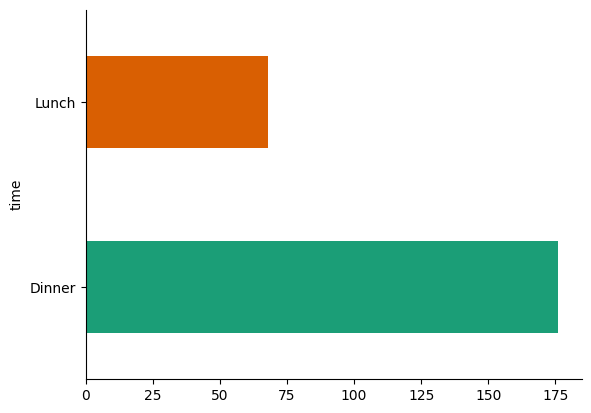

In [8]:
# @title time

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

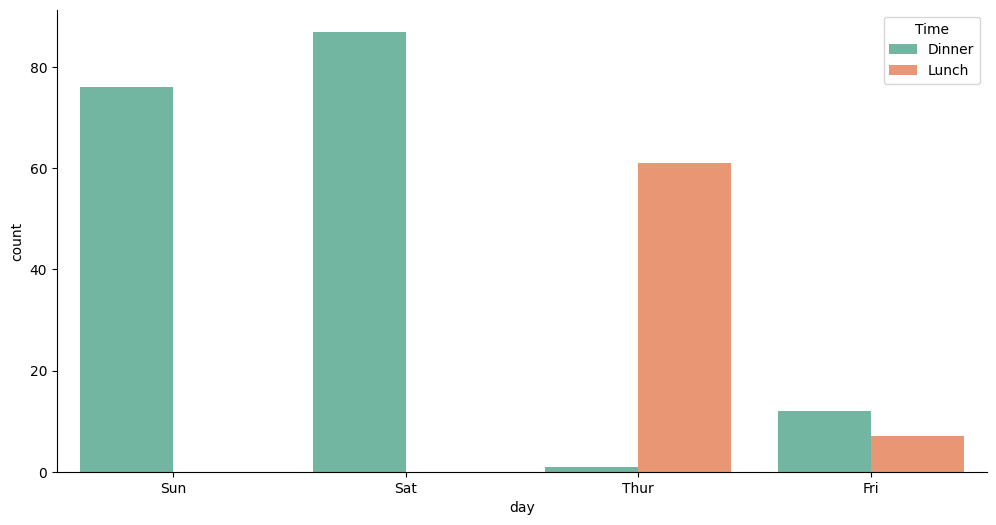

In [9]:
# @title Customer Count by time of Day

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='day', hue='time', data=data, palette='Set2')
plt.legend(title='Time', loc='upper right')
plt.gca().spines[['top', 'right',]].set_visible(False)

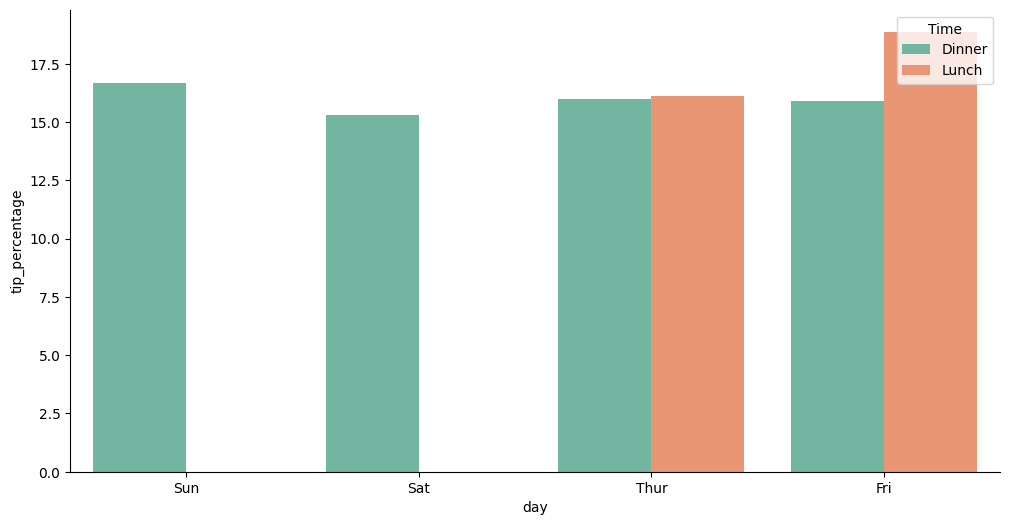

In [10]:
# @title tip percentage by time of Day

plt.figure(figsize=(12, 6))
sns.barplot(x='day', y='tip_percentage', hue='time', errorbar= None, data=data, palette='Set2')
plt.legend(title='Time', loc='upper right')
plt.gca().spines[['top', 'right',]].set_visible(False)

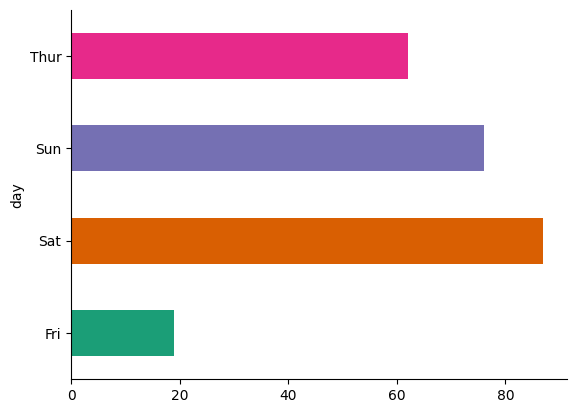

In [ ]:
# @title The Day Customer Visit the Restaurant

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

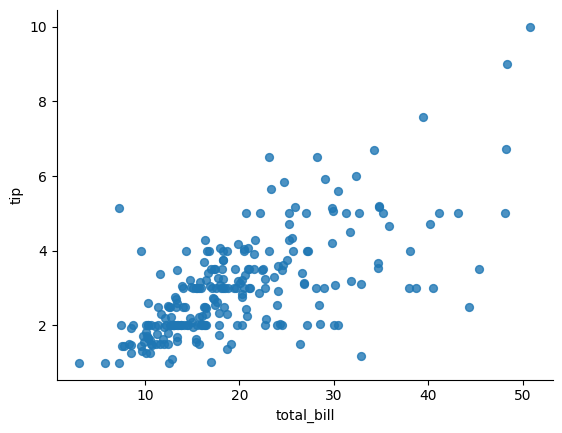

In [ ]:
# @title total_bill vs tip

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='total_bill', y='tip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Regression Analysis

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score